In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

숫자 이미지를 분류하는 문제를 풀고자 합니다. 
(0 이미지는 0으로, 1 이미지는 1로 분류 등)

우리가 지금까지 배운 분류기 (classifier)는 logistic regression이 있죠?

이번시간에는 logistic regression에 대해서 살펴보겠습니다.

우선, scikit-learn을 활용해서 logistic regression을 수행해보겠습니다.

해당 코드의 일부는 아래 링크를 참조하여 제작하였습니다.

https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

우선, 데이터를 불러오겠습니다. 

In [ ]:
digits = load_digits(n_class=2) # digits data load
print("Image Data Shape", digits.data.shape) # 350: the number of images, 64: shape (8 by 8 image)
print("Label Data Shape", digits.target.shape)

Image Data Shape (360, 64)
Label Data Shape (360,)


targets이 어떻게 생겼는지 확인해보겠습니다.

In [ ]:
print(digits.target)

[0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1
 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0
 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0]


우리에게 주어진 데이터가 어떠한 데이터인지 확인해보는 과정이 필요합니다.

백문이불여일견 이라는 말이 있죠? 직접 눈으로 보는것이 가장 좋습니다.

이번에는 image를 그려보겠습니다.

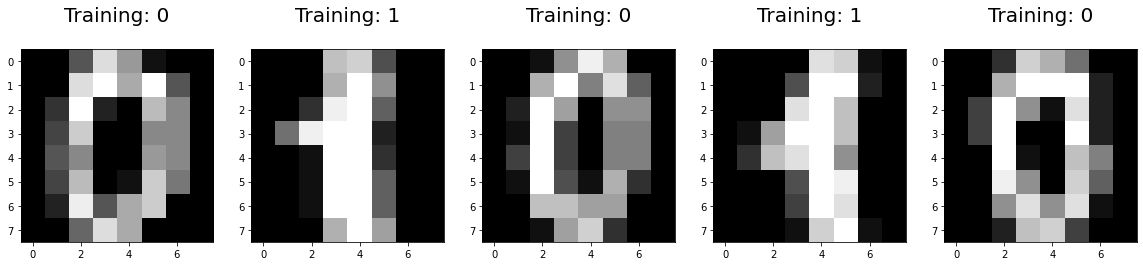

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)

이번에는 데이터를 0과 1사이의 숫자로 변환 시켜주겠습니다.

In [ ]:
digits.data = digits.data/np.max(digits.data)

이번에는 Training Data와 Test Data로 나눠보겠습니다.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)
y_train = y_train[:,np.newaxis] # (270,) => (270,1)
y_test = y_test[:,np.newaxis] # (90,) => (90,1)

Q1 이제 데이터는 준비가 완료되었습니다. Training data를 기반으로, Logistic regression의 parameter를 학습해보겠습니다.

In [ ]:
model = LogisticRegression()
model.?????(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Q2 이제는 학습완료된 Logistic Regression 모델을 가지고, Test 해보겠습니다.

In [ ]:
predictions = model.?????(x_test)
score = model.score(x_test, y_test) # accuracy

이제는, 우리가 직접 logistic regression을 구현해보겠습니다.

logistic regression의 gradient 부분은 제외하고 구현해보겠습니다.

먼저, 우리에게 필요한 sigmoid 함수를 직접 만들어보겠습니다.

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Q3 이번에는 cost를 계산하는 함수를 만들어보겠습니다.

데이터가 m개 있습니다.

우리는 데이터 각각의 cost를 구해준 다음에, 그것들의 평균을 내보내줄 것입니다.

In [ ]:
def compute_cost(x_train,y_train,beta_hat):
  # Lecture11 20p
  m = len(y_train)
  epsilon = 1e-5
  cost = 0
  for i in range(m):
    x_beta = np.dot(x_train[i],beta_hat)
    y_hat = ?????(x_beta)
    cost = cost + -(y_train[i]*????? +(1-y_train[i])*?????)
  cost = cost/m
  return cost 

In [ ]:
def gradient_descent(x_train, y_train, params, learning_rate, iterations):
  # Lecture11 22p
    m = len(y_train)
    cost_history = np.zeros((iterations,1))
    for i in range(iterations):
        params = params - (learning_rate/m) * (np.dot(x_train.T, (sigmoid(np.dot(x_train, params)) - y_train))) 
        cost_history[i] = compute_cost(x_train, y_train, params)

    return (cost_history, params)

Q4. 추후에 test data에 대한 y 예측 (predict)에 활용됩니다.

In [ ]:
def predict(x_test, params):
    # Lecture11 23p
    return np.?????(sigmoid(np.dot(x_test,params)))

In [ ]:
iterations = 100
learning_rate = 0.03
n = np.size(x_train,1)
beta_hat = np.zeros((n,1))
initial_cost = compute_cost(x_train, y_train, beta_hat)
print("Initial Cost is: {} \n".format(initial_cost))

Initial Cost is: [0.69312718] 



각각의 크기를 확인하는 것은, 코드를 이해하는데에 큰 도움이 됩니다.

In [ ]:
print(x_train.shape,beta_hat.shape,y_train.shape)

(270, 64) (64, 1) (270, 1)


In [ ]:
(cost_history, beta_hat) = gradient_descent(x_train, y_train, beta_hat, learning_rate, iterations)

Q5 이제 cost에 대한 그림을 그려보겠습니다.

iteration이 지날수록 점점 cost가 줄어드는것이 보이시죠?

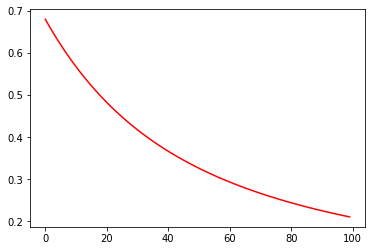

In [ ]:
?????

이제 최적화된 parameter를 가지고, test 데이터에 대한 예측을 진행하겠습니다.

In [ ]:
# Lecture11 23p
y_pred = predict(x_test, beta_hat)
score = float(sum(y_pred == y_test))/ float(len(y_test))
print(score)

1.0


* 선형회귀에서는 에러를 minimize해주는 beta hat을 최적화 => 목적식인 $e'e$

* 반면, 로지스틱 회귀에서는 역시 마찬가지로 Beta hat을 최적화하는게 목적인데 목적식이 $L_{CE}$ (loss는 cost임)

어쨌든 학습할때 최적화의 대상은 모두 beta hat이고, 최적화의 목적함수라는게 따로 있는 것. (로지스틱 회귀에서 시험문제 3개 ; 강의 Or 코드)